# First Steps & Orientation

## Acquire, Describe, and Visualize Data
- The descriptive statistics tell a story of the data
- Vizualizing the data tells another layer of the story

In [1]:
# Run this block of code in order to import all of the libraries that we need for this module.
# Shift + Enter on your keyboard or click the play button to run code cells. 
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Vizualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Acquire the data:
- In practice, our data isn't always 100% ready, clean, and accessible.
- You're lucky if you get a spreadsheet or CSV ready to go!

In [2]:
# Acquire the data 
quartet = pd.read_csv("../input/quartet.csv", index_col="id") # this is how the pandas library reads CSV files. Then we assign to a variable.

In [3]:
# There are 4 groups that each have an X value and a Y value
print(quartet)

   dataset     x      y
id                     
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0

## Descriptive Statisitics
- The `.describe()` method provides descriptive statistics for pandas dataframes
- `mean` is the average of values
- `std` is the "standard deviation" which represents the typical distance from the mean to an observation in the data. 
- Think of standard deviation as a measure of how much of a spread in the data there is
- Min and Max are the minimum and maximum values

In [4]:
# Let's look at the entire dataset
quartet.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


## Let's group by the "dataset" column to compare

In [5]:
# Let's look at the average of each quartet and the standard deviation 
# Mean means the average value
# Standard deviation represents the typical distance from the mean to an observation in the data. (How much of a spread in the data is there)
quartet.groupby('dataset').agg(["mean", "std"])

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

## Looking at the above measures of central tendency, what hypothesis do you have?
- Looks like each dataset is pretty similar, right?
- For x values that range between 4 to 19 and y values that range from 3 to 12, these seem pretty tight, right?

## Let's make some linear regressions for each one of the datasets!
- Fitting a linear regression means to fit a line to the data points.
- This is often thought of as a trend line.
- The chart below shows data points and the linear regression fit to those data points.

Example of fitting a line to the data points

![linear regression fitting](https://cdn.glitch.com/c1e65908-81db-4c5b-8274-40cc385dfa54%2Ffitting_a_line_to_points.svg?v=1563290280842)

In [6]:
# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### Let's make a linear model for the 1st data set

In [7]:
first = quartet[quartet.dataset == "I"]
X = first[["x"]]
y = first[["y"]]

first_linear_model = LinearRegression().fit(X, y)
first_intercept = first_linear_model.intercept_[0]
first_slope = first_linear_model.coef_[0][0]

# y = mx + b
print("Intercept is", first_intercept)
print("Slope is", first_slope)

Intercept is 3.0000909090909103
Slope is 0.5000909090909091


And now let's model the 2nd, 3rd, and 4th datasets

In [8]:
# Fit the regression for the second dataset
second = quartet[quartet.dataset == "II"]
X = second[["x"]]
y = second[["y"]]

second_linear_model = LinearRegression().fit(X, y)
second_intercept = second_linear_model.intercept_[0]
second_slope = second_linear_model.coef_[0][0]

# Then make a new model for the third dataset
third = quartet[quartet.dataset == "III"]
X = third[["x"]]
y = third[["y"]]

third_linear_model = LinearRegression().fit(X, y)
third_intercept = third_linear_model.intercept_[0]
third_slope = third_linear_model.coef_[0][0]

# And finally fit the regression for the 4th dataset
forth = quartet[quartet.dataset == "IV"]
X = forth[["x"]]
y = forth[["y"]]

forth_linear_model = LinearRegression().fit(X, y)
forth_intercept = forth_linear_model.intercept_[0]
forth_slope = forth_linear_model.coef_[0][0]


first = {
    "dataset": "I",
    "slope": first_slope,
    "intercept": first_intercept
}
second = {
    "dataset": "II",
    "slope": second_slope,
    "intercept": second_intercept
}

third = {
    "dataset": "III",
    "slope": third_slope,
    "intercept": third_intercept
}

forth = {
    "dataset": "IV",
    "slope": forth_slope,
    "intercept": forth_intercept
}

output = pd.DataFrame([first, second, third, forth])
output

,dataset,intercept,slope
0,I,3.000091,0.500091
1,II,3.000909,0.500000
2,III,3.002455,0.499727
3,IV,3.001727,0.499909


### Now let's compare each linear model visually

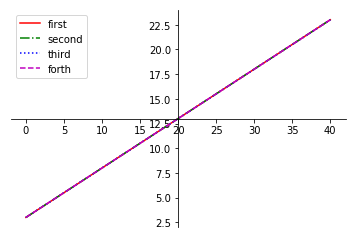

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0,40,40)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, first_slope * x + first_intercept, '-r', label='first')
plt.plot(x, second_slope * x + second_intercept,'-.g', label='second')
plt.plot(x, third_slope * x + third_intercept,':b', label='third')
plt.plot(x, forth_slope * x + forth_intercept,'--m', label='forth')
plt.legend(loc='upper left')
plt.show()

### These 4 linear models for the 4 datasets are right on top of eachother and that makese sense given the slopes and intercepts

In [10]:
print(output)

  dataset  intercept     slope
0       I   3.000091  0.500091
1      II   3.000909  0.500000
2     III   3.002455  0.499727
3      IV   3.001727  0.499909


## Let's See! (Vizualize the datapoints and regression lines)

In [11]:
# Once you have compared the descriptive statistics of each of the datasets in the quartet,
# Uncomment the next line and run this cell to visualize all 4 datasets next to eachother!
# sns.lmplot(x="x", y="y", col="dataset", col_wrap=2, data=quartet,height=5, aspect=1.5);

## Lessons learned
- Ask yourself, what did you gain from this exercise? 